In [3]:
深度学习第二章；神经网络的数学基础

In [1]:
import tensorflow as tf 

2024-03-18 20:40:35.418920: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.__version__

'2.16.1'

In [ ]:
首先熟悉并理解深度学习的事例数据，这个是一个MNIST数据集，包含60000个28*28灰度图像的手写的数据，以及60000个标签，同时也包含10000个测试数据，10000张测试图片以及正确的
数字分类，深度学习的目标是准确对测试数据进行分类，比较深度学习预测的和真实的标签之间的差异

In [ ]:
代码清单2-1 加载Keras中的MNIST数据集

In [7]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [9]:
train_images.shape

(60000, 28, 28)

In [12]:
train_labels.shape

(60000,)

In [13]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
test_images.shape
test_labels.shape

(10000,)

In [ ]:
代码清单2-2 神经网络架构
创建一个神经网络的架构，包含两层（layer），每层都含有一个激活函数

In [16]:
from tensorflow import keras 
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
在训练模型前，需要指定编译，编译就是给模型在进行学习的时候，设定三个特定的条件，使得在模型学习的时候能够根据这三个条件进行自我更新，第一个是优化器，优化器是模型基于训练数据
自我更新的机制，其目的是提高模型的精度，第二个是损失函数，衡量模型在学习的性能，比较使用一组参数后的预测结果与一个学习给定的结果之间的差异，损失越小，则说明学习更加有效
从而是模型向损失更小的方向进行，第三个是指标，即正确分类图像所占的比例，这个在分类数据中就是正确率

In [ ]:
代码清单2-3 编译步骤

In [18]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
数据预处理，对上面的训练数据和测试数据进行转化，这些数据首先都是编码utf8数组，将这些数组转化为float32位数组

In [ ]:
代码清单2-4 准备图像数据

In [19]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

In [22]:
train_images.shape

(60000, 784)

In [23]:
test_images.shape

(10000, 784)

In [ ]:
完成上述数据转化，就可以利用模型对数据进行训练，在keras中调用模型对fit方法
代码清单2-5 

In [24]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8711 - loss: 0.4430
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9660 - loss: 0.1182
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9785 - loss: 0.0731
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9845 - loss: 0.0529
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9895 - loss: 0.0367


In [ ]:
现在可以根据上面的预测模型对新的图片进行预测了
代码清单2-6 利用模型对数据进行预测

In [25]:
test_digits = test_images[0:10]
test_digits

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
predictions = model.predict(test_digits)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


In [27]:
predictions.shape

(10, 10)

In [28]:
predictions[0]

array([6.17950420e-08, 1.06358975e-08, 1.45883469e-05, 1.30804823e-04,
       8.77893036e-11, 2.76359913e-07, 5.87269111e-13, 9.99844313e-01,
       1.19550589e-06, 8.92807566e-06], dtype=float32)

In [29]:
predictions[0].argmax()

7

In [30]:
predictions[0][7]

0.9998443

In [31]:
test_labels[0]

7

In [ ]:
在全新的数据上进行模型的评估，上面的预测是在一个测试数据中取了前10个进行预测，并且看了一下第一个预测的准确性，准确性达到99%，但是我们这次是从所有的测试数据上进行评估
代码清单2-7

In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc:{test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9775 - loss: 0.0723
test_acc:0.980400025844574


In [ ]:
神经网络的数据表示
张量，tensor是一个数据容器，表示的是数据在空间中存储的一种表示方法。如一个数字就是标量，也是0阶张量，普通的向量，包含几个数据或者是多个数字的一维的向量是1阶张量。张量的
轴或者阶就是张量的数据维度，如向量是1，矩阵是2，n个矩阵的存储就是3,是因为包含了3个维度。

In [34]:
import numpy as np
x = np.array(12)
print(x)
x.ndim

12


0

In [35]:
x = np.array([12,3,6,14,7])
print(x)
x.ndim

[12  3  6 14  7]


1

In [36]:
x = np.array([[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]])
x.ndim
print(x)

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]


In [37]:
x.ndim

2

In [39]:
x = np.array([
             [[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]],
    
              [[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]],
    
              [[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]]
])
x.ndim # 三个矩阵打包，形成一个新的数组，这个就是3阶张量，是一个数据立方体，还可以将这个样的多个数据立方体进行打包，就是4阶的张量，可以无限的进行打包

3

In [ ]:
关键属性，轴的个数，就是说张量的维度，0阶张量没有轴，就是一个数字而已，一阶张量的轴是1，表示在这个轴上可以有很多数字，二阶张量的轴是2，表示有两个方向，每个轴上都有很多
数字，3阶张量的轴是3，表示有三个维度，每个维度上有很多数字
形状，shape指的是每个轴上的分布的数字的数目，比如一个2*3的矩阵，就是2行，3列，向量一般是(n,)n指的是这个向量里边的数目，标量，也就是一个数，形状是（）空的括号。
数据类型，一般是指张量所包含的数据类型，包括float16，float32， float64，utf8等，还有string类型的张量

In [40]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [41]:
train_images.ndim

3

In [42]:
train_images.shape

(60000, 28, 28)

In [43]:
train_images.dtype

dtype('uint8')

In [46]:
train_images[0][:10,:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156]], dtype=uint8)

In [ ]:
利用matplotlib可以显示这些数字组成的图片，更加直观的观看
代码清单2-8 显示第四个数字

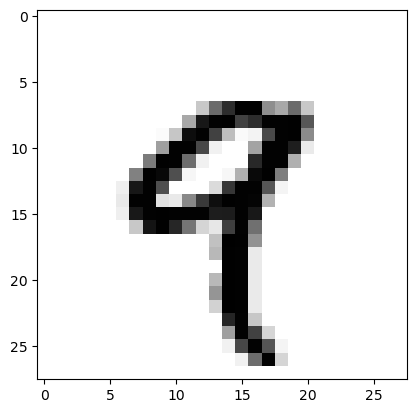

In [48]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [49]:
train_labels[4]

9

In [ ]:
2.26 在numpy中进行张量的操作

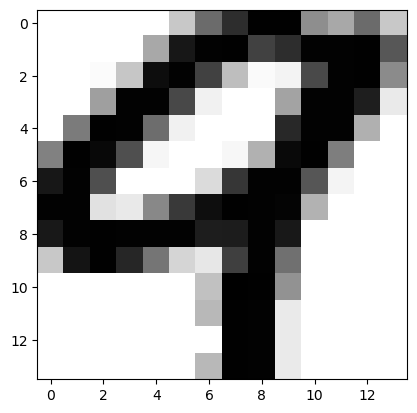

In [52]:
digit1 = train_images[4,7:-7, 7:-7]
digit2 = train_images[4, 14:, 14:]
plt.imshow(digit1, cmap=plt.cm.binary)
plt.show()

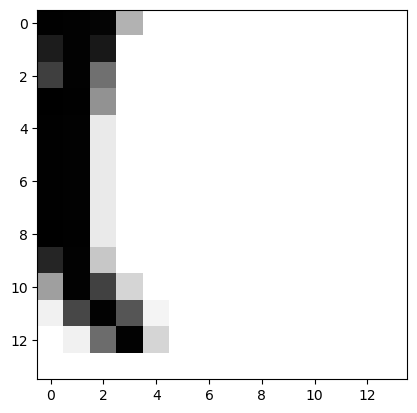

In [53]:
plt.imshow(digit2, cmap=plt.cm.binary)
plt.show()

In [55]:
my_slice = train_images[10:100, :,:] 
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)
my_slice.ndim

(90, 28, 28)


3

In [ ]:
2.3.1 逐元素运算，张量的一些运算

In [56]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j],0)
    return x 

In [58]:
x = np.array([[2,-3,4],
              [3,4,5],
              [-1,0,-2]
             ])
naive_relu(x)

array([[2, 0, 4],
       [3, 4, 5],
       [0, 0, 0]])

In [60]:
def naive_add(x,y):
    assert len(x.shape) == 2
    assert len(x.shape) == len(y.shape)
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            x[i,j] += y[i,j]
    return x 

In [61]:
y = np.array([[1,2,3],
              [3,4,5],
              [3,4,-1]
             ])
naive_add(x,y)

array([[ 3, -1,  7],
       [ 6,  8, 10],
       [ 2,  4, -3]])

In [62]:
z = x + y # 两个矩阵每个元素直接one by one的相加
z

array([[ 3, -1,  7],
       [ 6,  8, 10],
       [ 2,  4, -3]])

In [63]:
np.maximum(x,0) # numpy 自己的Relu， 就是判断每个数字是否是大于0，大于0还是它本身，要是小于或者等于0就设置为0

array([[2, 0, 4],
       [3, 4, 5],
       [0, 0, 0]])

In [ ]:
2.3.2 广播（broadcast）两个形状不一样的张量如何想加，这个时候会把一个较小的张量进行广播，来匹配较大的张量，比如一个矩阵和一个向量进行相加，通常会把这个向量进行广播

In [71]:
import numpy as np
X = np.random.random((32,10))
#print(x)
y = np.random.random((10,))
print(y)

[0.91948573 0.68378624 0.6753012  0.83516985 0.70359784 0.28137073
 0.8335972  0.20296386 0.3665551  0.68389987]


In [84]:
y = np.expand_dims(y,axis=0)
y

array([[[[0.91948573, 0.68378624, 0.6753012 , 0.83516985, 0.70359784,
          0.28137073, 0.8335972 , 0.20296386, 0.3665551 , 0.68389987]]]])

In [67]:
y

array([[0.05493952, 0.3781953 , 0.7120115 , 0.70001572, 0.3918344 ,
        0.2620828 , 0.97899252, 0.5210747 , 0.97330219, 0.04793427]])

In [77]:
Y = np.concatenate([y]*32, axis=0)
Y.ndim

2

In [78]:
X.ndim

2

In [79]:
Y.shape

(32, 10)

In [80]:
X.shape

(32, 10)

In [81]:
Z = X + Y

In [85]:
len(X.shape)

2

In [86]:
len(Y.shape)

2

In [89]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0] # 判断矩阵的列的个数和向量的长度是否是相等的
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[j]
    return x


In [90]:
x = np.array([[2,2,2],
              [2,3,4],
              [1,2,3]
             ])
y = np.array([1,2,1])
naive_add_matrix_and_vector(x,y)

array([[3, 4, 3],
       [3, 5, 5],
       [2, 4, 4]])

In [91]:
import numpy as np
x = np.random.random((64,3,32,10))
y = np.random.random((32,10))
z = np.maximum(x,y)

In [94]:
x = np.array([1,2,3])
y = np.array([1,2,3])
z = np.dot(x, y)
z

14

In [95]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z 

In [96]:
naive_vector_dot(x, y) # 两个向量的点积是一个标量，只有长度相同的向量才能进行点积

14

In [115]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]  # 矩阵的列数和向量的行数相同，向量是行
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i,j]*y[j]
    return z 

In [116]:
naive_matrix_vector_dot(np.array([[1,2,3],[2,3,4],[3,4,5]]), np.array([1,2,3]))

array([14., 20., 26.])

In [104]:
naive_matrix_vector_dot(np.array([[1,2,3],[2,3,4],[3,4,5],[1,2,3]]), np.array([1,1,1]))

array([ 6.,  9., 12.,  6.])

In [109]:
k = np.array([[1,2,3],[2,3,4],[3,4,5],[1,2,3]])
k.shape[1]

3

In [117]:
f = np.array([1,1,1])
f

array([1, 1, 1])

In [129]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [134]:
x = np.array([[1,2,3],[2,3,4],[3,4,5],[1,2,3]])
y = np.array([1,1,1])
z = naive_matrix_vector_dot(x, y)

In [139]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i,:]
            column_y = y[:,j]
            z[i,j] = naive_vector_dot(row_x, column_y)
    return z 

In [140]:
x = naive_matrix_dot(np.array([[1,2,3],[1,2,3],[3,4,5],[1,1,1]]), np.array([[1,2,3,2],[1,2,4,1],[4,5,6,3]]))
x

array([[15., 21., 29., 13.],
       [15., 21., 29., 13.],
       [27., 39., 55., 25.],
       [ 6.,  9., 13.,  6.]])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
深度学习的步骤：
#1. 抽取样本x和目标y_true 组成一个数据批量
#2. 在x上运行模型（这一步叫做向前传播，forward pass）, 得到预测值y_pred 
#3. 计算模型在这批数据上的损失值，用于衡量y_pred 和y_true 之间的差距
#4. 更新模型的所有权重，以略微减少模型在这批数据上的损失值
更新模型的权重是一个难点，如果保持模型的其他系数不变，只更新一个系数的变化，变大，计算一次损失值，然后变小计算一次损失值，比较损失值的方向，从而更新模型的系数，但是当模型的
系数非常多的时候，对每个系数都进行两次运算是非常低效的。一种高效的方法是梯度下降法（gradient descent）
模型系数的变化导致损失值发生可预测的微小变化，我们可以用一个叫做梯度的数学运算符来描述模型系数向不同方向移动时，损失值如何变化。计算出梯度就可以利用他来更新系数，使损失
值减小（在一次更新中完成全部，而不是一次更新一个系数）


In [ ]:
tensorflow 梯度带
GradientTape 是一个API，可以利用这个进行自动微分运算，它是一个python的作用域，能够以计算机图的形式记录在其中运算的张量运算。计算机图可用来获取任意输出和相对于任意变量和变量集的梯度
这些变量和变量集是tf.Variable类的实例。tf.Variable是一类用于保存可变状态的张量，比如神经网络的权重就是tf.Variable的实例


In [150]:
import tensorflow as tf 
x = tf.Variable(0)
with tf.GradientTape() as tape:
    y = 2*x+3
grad_of_y_wrt_x = tape.gradient(y,x)
print(grad_of_y_wrt_x)

None


In [ ]:
GradientTape 也可以用来张量运算

In [148]:
x = tf.Variable(np.zeros((2,2)))
with tf.GradientTape() as tape:
    y = 2 * x +3 
grad_of_y_wrt_x = tape.gradient(y,x)

In [149]:
print(grad_of_y_wrt_x)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float64)


In [151]:
W = tf.Variable(tf.random.uniform((2,2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2,2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b 
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b]) # 分别对W 和 b 进行求导， 获得的是两个张量，张量的形状和W 和 b是一致的
print(grad_of_y_wrt_W_and_b)

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.3044302, 1.3044302],
       [0.9692342, 0.9692342]], dtype=float32)>, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]


In [ ]:
手动从头创建一个tensorflow例
1. 简单的Dense 类
2. 简单的Sequential 类
3. 批量生成器


In [ ]:
#1 简单的Dense类

In [152]:
import tensorflow as tf 
class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval= 1e-1)
        self.W = tf.Variable(w_initial_value)
        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)
    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)
    @property
    def weights(self):
        return [self.W, self.b]

In [153]:
#2 简单的sequential类
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers
    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)           # layer() 相当于NaiveDense 中的self.activation(tf.matmul(inputs, self.W) + self.b) 函数 输出的是权重
        return x
    @property
    def weights(self):             # 把上一层的权重和这一层的权重累加（每个层之间是靠权重来联系的，并且是累加的）
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights 

In [ ]:
利用这个NaiveDense类和NaiveSequential类，我们可以创建一个与Keras 类似的模型

In [154]:
model = NaiveSequential([
    NaiveDense(input_size= 28*28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

In [163]:
#2 小批量生成器
import math
class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)
    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels 


In [ ]:
# 完成一次训练步骤，最难的一步就是在一批数据上运行模型后更新模型权重，需要做到以下几点
#1 计算模型对图像批量的预测值
#2 根据实际标签，计算这些预测值的损失值
#3 计算损失相对于模型权重的梯度
#4 将权重沿着梯度的反方向移动一小步


In [156]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions) # 计算每个样品的损失值，
        average_loss = tf.reduce_mean(per_sample_losses) 
    # 运行向前传播，在GradientTape 作用域内计算模型的预测值
    gradients = tape.gradient(average_loss, model.weights)
    # 计算损失相对于权重的梯度，输出的gradients是一个列表，每个元素对于model.weights列表中的权重
    update_weights(gradients, model.weights)
    # 利用梯度来更新权重 
    return average_loss

In [157]:
from tensorflow.keras import optimizers
optimizer = optimizers.SGD(learning_rate=1e-3)
def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients,weights)) # 根据小批量梯度下降来优化


In [ ]:
完整的模型训练

In [159]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [164]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255
fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 7.22
loss at batch 100: 2.23
loss at batch 200: 2.23
loss at batch 300: 2.06
loss at batch 400: 2.23
Epoch 1
loss at batch 0: 1.90
loss at batch 100: 1.88
loss at batch 200: 1.86
loss at batch 300: 1.70
loss at batch 400: 1.84
Epoch 2
loss at batch 0: 1.58
loss at batch 100: 1.58
loss at batch 200: 1.54
loss at batch 300: 1.42
loss at batch 400: 1.53
Epoch 3
loss at batch 0: 1.33
loss at batch 100: 1.34
loss at batch 200: 1.27
loss at batch 300: 1.20
loss at batch 400: 1.29
Epoch 4
loss at batch 0: 1.13
loss at batch 100: 1.16
loss at batch 200: 1.07
loss at batch 300: 1.04
loss at batch 400: 1.13
Epoch 5
loss at batch 0: 0.98
loss at batch 100: 1.02
loss at batch 200: 0.93
loss at batch 300: 0.92
loss at batch 400: 1.00
Epoch 6
loss at batch 0: 0.87
loss at batch 100: 0.91
loss at batch 200: 0.82
loss at batch 300: 0.83
loss at batch 400: 0.91
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.82
loss at batch 200: 0.74
loss at batch 300: 0.76
loss at batch 40

In [165]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy:{matches.mean():.2f}")

accuracy:0.81


In [166]:
model